#### Import libraries & data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

https://stackoverflow.com/questions/45121556/unable-to-load-cifar-10-dataset-invalid-load-key-x1f

In [2]:
from tensorflow.keras.datasets import cifar10
data = cifar10.load_data()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
(trainX, trainy), (testX, testy) = data

numBatches = 1 # number of batches of augmented data (linerly increases dataframe size) 

#### Display the data.
(this bit was mostly for my own benifit)

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

https://machinelearningmastery.com/how-to-load-and-visualize-standard-computer-vision-datasets-with-keras/

In [4]:
len(trainX), len(testX)
len(trainy), len(testy)

(50000, 10000)

In [5]:
(np.rot90(trainy), np.rot90(testy))

(array([[6, 9, 9, ..., 9, 1, 1]], dtype=uint8),
 array([[3, 8, 8, ..., 5, 1, 7]], dtype=uint8))

In [6]:
items = np.rot90(trainy)[0]
#items = np.where(np.rot90(trainy)[0]==9)[0]
#print(items)
indexes = np.random.choice(items, 20, replace=False)  
#print(indexes)
DisplayIm = trainX[indexes]

https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

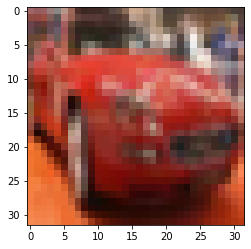

In [7]:
 for i in range(20):
    #plt.figure()
    plt.imshow(DisplayIm[i])

### Data augmentation

##### Functions to plot images for testing

https://deeplizard.com/learn/video/14syUbL16k4

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/NumpyArrayIterator

In [8]:
def plotImages(images_arr, n=10):
    fig, axes = plt.subplots(1, n, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

##### ImageDataGenerator for data augmentation
libary that creates modified versions of images in the dataset 


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# don't increase these values! I made them as large as i could with the data still making sence.
gen = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.5, 
                         height_shift_range=0.5, 
                         brightness_range=[0.2,1.7],
                         shear_range=0.3, 
                         zoom_range=0.10, 
                         channel_shift_range=30., 
                         horizontal_flip=True)

##### get the data to augment

In [10]:
aug_trainX, aug_trainy = trainX[50:55], trainy[50:55]

In [11]:
aug_trainX, aug_trainy = trainX, trainy

##### apply the ImageDataGenerator to the dataframe to be augmented

In [12]:
batch_size=numBatches * len(aug_trainy)
aug_iter=gen.flow(x=aug_trainX, y=aug_trainy, batch_size=batch_size, shuffle=False, seed=None)

``` python
aug_X, aug_y = next(aug_iter) # generates a new batch of augmented training data.
``` 
Every time you run it, it generates a new set of data. (dataframe increases linearly every time applied)

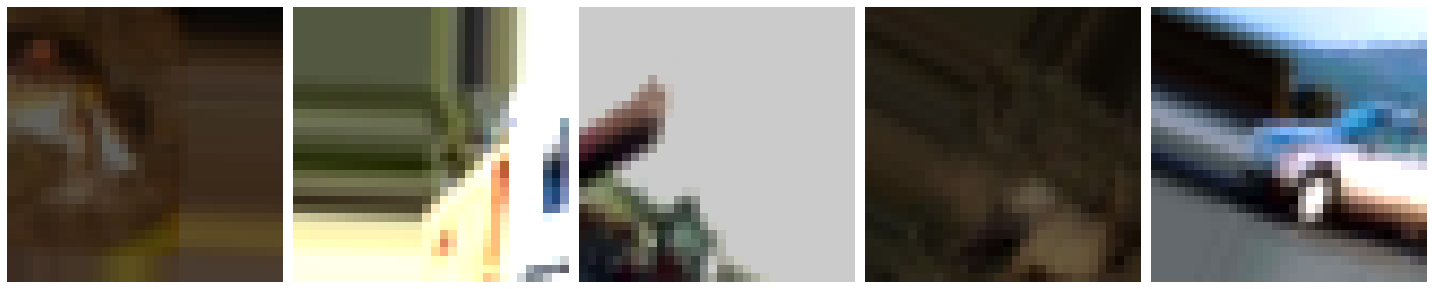

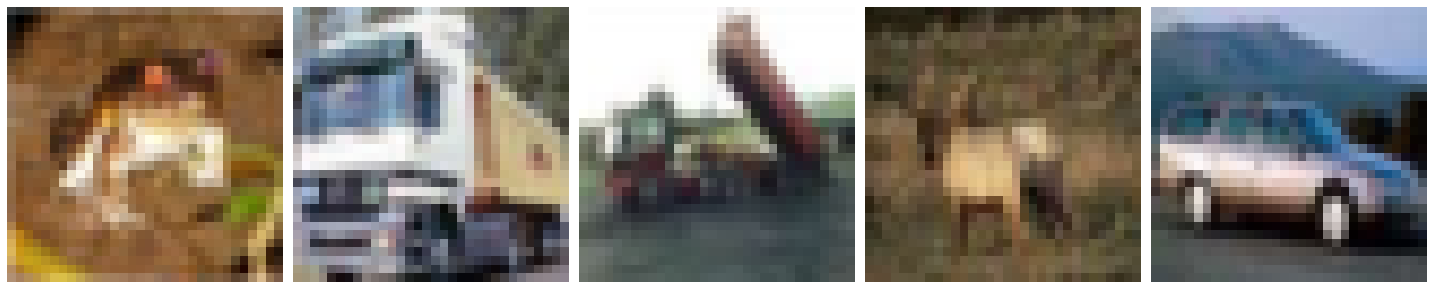

Wall time: 38.8 s


In [13]:
%%time
# takes about 40s
aug_X, aug_y = next(aug_iter)
aug_X = aug_X.astype(np.uint8)
plotImages(aug_X, 5)       # modified data
plotImages(aug_trainX, 5)  # origional data

In [14]:
# append new data to origional (double the data)
aug_trainX=np.concatenate((aug_trainX, aug_X), axis=0)
aug_trainy=np.concatenate((aug_trainy, aug_y), axis=0)
#aug_trainX, 
#aug_trainy

In [15]:
len(aug_trainy) # check new length of data

100000

##### Same again but with test Data
This is the same code as above just denser & without as many tests inbetween

In [16]:
%%time
# get test data
aug_testX, aug_testy = testX, testy

# apply the ImageDataGenerator to the dataframe to be augmented
batch_size= numBatches * len(aug_trainy)
aug_iter=gen.flow(x=aug_testX, y=aug_testy, batch_size=batch_size, shuffle=False, seed=None)

# generate a new batch of augmented test data
aug_X, aug_y = next(aug_iter)
aug_X = aug_X.astype(np.uint8)

# append new data to origional (double the data)
aug_testX=np.concatenate((aug_testX, aug_X), axis=0)
aug_testy=np.concatenate((aug_testy, aug_y), axis=0)

Wall time: 7.87 s


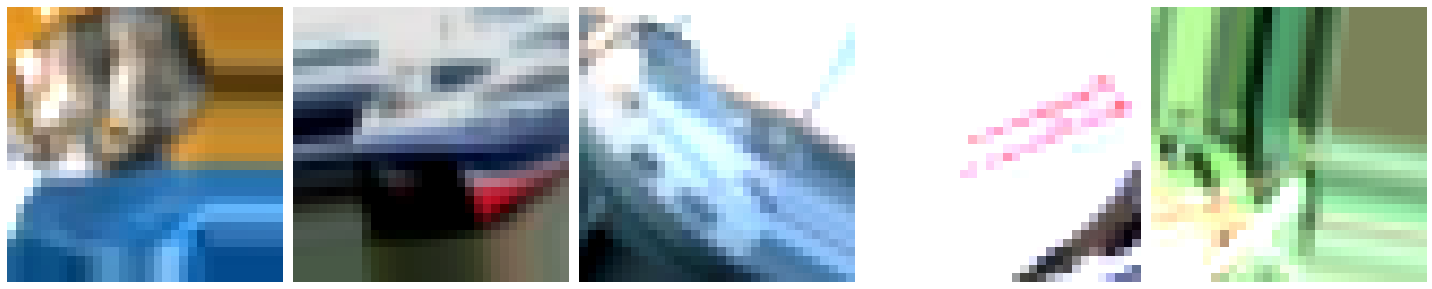

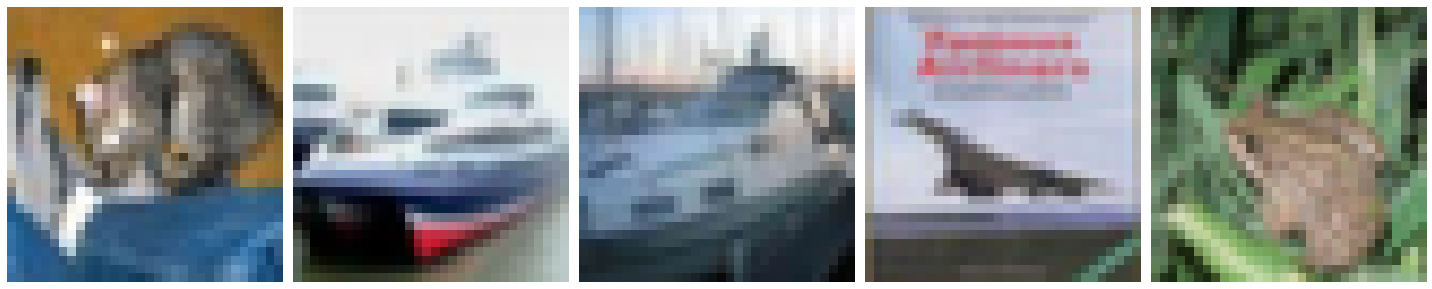

In [17]:
# view test data
len(aug_trainy) # check new length of data

plotImages(aug_X, 5)       # modified data
plotImages(aug_testX, 5)  # origional data

In [18]:
# Conclude augmented Data
aug_data = (aug_trainX, aug_trainy), (aug_testX, aug_testy)

to increase dataframe size, increase 'numBatches' <br>
It is currently set to value: 1, in cell: 3

##### Notes about using augmented training data
It is somthing else we can write about in our report is the trade-off between the amount of augmented data to training time & training model quality.

More data should make the model better (up to a point as it is all just modified versions of current data). <br>
However it will also increase training time, so will have a trade off. We grath both, and can put that in the report.

If it improves the model, great. <br>
If not, Why? Are the ImageDataGenerator values too high or low? <br>
Either way it is somthing else we can write about